# Homework 4: Classification

## Instructions

Your HW submission should consist of **one pdf or HTML file** exported from the Jupyter Lab containing the answers to all the questions included in the homework.

You will use Jupyter Lab exclusively for this homework. All the cells in this notebook is editable. You need to edit, insert `markdown` and `code` cells to complete the homework.

If you are having trouble with installing the package, first look at the [troubleshooting guide](https://www.notion.so/alanchen/R-FAQ-Troubleshooting-Guide-97dae246efad44b293ffb7b13f8a959f) or consult the instructor. Or you can use MyBinder: https://z.umn.edu/idsc4444mybinder

> If you are running this notebook on MyBinder, be sure to download your notebook, otherwise all your progress will be lost. You will need to reupload your notebook to MyBinder next time to restore progress.

> If you are running this notebook locally on your own machine, you can simply save the notebook.

> AVOID writing all your codes in a single cell if there are multiple lines with meaningful outputs. Separate them and insert new cells as you see fit.

# Part 1: Theoretical Exercise (3 points)

Assume you need to build a model to predict to which class a customer belongs to
among three that categorize customers based on how much they have been spending
at your store: big spender (green points), medium spender (blue points) and low
spender (orange points).

You have a training dataset with a total of 75 data points (30 blue, 20 orange, 25
green) and you have two attributes/predictors you are considering: the customer’s
age and the customer’s income. The graph below shows you a plot of the data, using
these two attributes.

<img src="https://i.loli.net/2020/11/25/mSQsja8iEdV45kx.png" width="50%" style="margin: auto">

You decide to train a decision tree on the dataset. The decision tree uses the concept
of *entropy* to decide on which attribute/value to partition your dataset.

Feel free to use Excel/Numbers to compute the entropy (remember, you need to use log in base
2 for your calculations, i.e. $\log_2(\cdot)$. To do that, simply use the log function in Excel/Numbers, and then
specify first the number you want to compute the log for, and after the comma,
specify 2 for the base), but **you must report the steps of your calculations or you will
lose points**.

## a) (0.5 point)

Compute the Entropy for the entire dataset and interpret the result.
Show your calculations. Feel free to round results to three decimals.

**Answer**

**Write your answer in this markdown cell**

## b) (1 point)

Assume that the decision tree algorithm is evaluating which attribute-value to use for the root node, and it is considering the attribute `Income` at value 50000 as candidate.

The graph below shows you the resulting partitions and the respective data
composition (so the partition to the left of the red line would be for `Income < 50000` and the partition to the right for `Income >= 50000`).

- Compute the entropy of each partition and compute the weighted entropy of
the two. Interpret the result.

- Then, compare it to the entropy of the entire
dataset (computed in point a) to determine the information gain.You must
show your calculations. Feel free to round results to three decimals.

<img src="https://i.loli.net/2020/11/25/RIgFmjolLW97DY2.png" width="70%" style="margin: auto">

**Answer**

**Write your answer in this markdown cell**

## c) (1 point)

Next, assume the decision tree is evaluating to split on the attribute `Income` at 75000.

The graph below shows you the resulting partitions and data composition of
the partitions: (so the partition to the left of the red line would be for `Income < 75000` and the partition to the right for `Income >= 75000`).

- Repeat the same process as before to compute the information gain.
- Interpret your result.
- You must show your calculations. Feel free to round results to two decimals.

<img src="https://i.loli.net/2020/11/25/e1aWSpmKuZbQhAj.png" width="70%" style="margin: auto">

**Answer**

**Write your answer in this markdown cell**

d) (0.5 point) Finally, compare the information gains obtained in point b) and c)
and determine which attribute-value the decision tree will pick first.

**Write your answer in this markdown cell**

# Part 2: Classification in R (7 points total)

For this question, you need to download two datasets: `credit_long.csv` and
`credit_short.csv`.

Both datasets contain data about credit cards balances of several individuals. For
each observation (individual), you have the following attributes:

- `LIMIT_BAL`: a continuous variable, capturing the credit limit on the customer’s
credit card
- `GENDER`: 1 = male, 2 = female
- `MARRIAGE`: 1 = married, 2 = single, 3 = other
- `AGE`: the age in years
- `BILL_AMT1` to `BILL_AMT6`: numerical variables containing the credit card balances of the previous 6 months. `BILL_AMT1` is the most recent credit balance (so for last month) while `BILL_AMT6` is the credit balance of 6 months ago.
- `PAY_AMT1` to `PAY_AMT6`: numerical variables containing the amount paid by the individual for each of the past 6 months. PAY_AMT1 is the most recent payment (so, payment made last month) while PAY_AMT6 is the amount paid
6 months ago.
- `DEFAULT`: our *Y*, the class variable. Default = NO, if the individual did not default this month; Default = YES if the individual did default.

You want to build a classification model to predict which customers will default next
month, based on the attributes available

## Q1 (3 points)

### a) (0.3)

Load the data and split it into 80% training data and 20% test data. Simply show the code.

In [7]:
# your code starts here
#library("caret")
#library("e1071")
#library("rpart")
#library("rpart.plot")
credit_short <- read.csv("credit_short.csv")
train_rows <- createDataPartition(y = credit_short$DEFAULT, p = 0.8, list = FALSE)
data_train <- credit_short[train_rows,]
data_test <- credit_short[-train_rows,]


### b) (0.3)

Assess whether you need to standardize the data. If yes, explain why
and assess which attributes you should standardize and apply the
standardization. If no, explain why. Report the code and your explanation.

In [9]:
#We need to standardize the data because the range of each attribute is different, normalization will improve the accuracy. 
#Attributes we need to standardize are LIMIT_BAL, GENDER, MARRIAGE, AGE, BILL_AMT1 to BILL_AMT6, PAY_AMT1 to PAY_AMT6. 
data_train_stand <- data_train
data_test_stand <- data_test
library("standardize")
data_train_stand[,1:16] <- apply(data_train_stand[,1:16],MARGIN=2,FUN=scale)
data_test_stand[,1:16] <- apply(data_test_stand[,1:16],MARGIN=2,FUN=scale)
head(data_train_stand)

,LIMIT_BAL,GENDER,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1.3046613,0.8193742,-1.0463099,-0.8188820,-0.6063222,-0.6417107,-0.2635716,0.1192323,-0.16031886,-0.46776543,-0.1319181,1.2078228,1.7955629,0.01935552,0.4715413,4.2196306,NO
3,-0.2968753,0.8193742,0.8744059,-1.0361281,-0.5921251,-0.5690967,-0.5380710,-0.5140843,-0.49767069,-0.48098624,-0.2966854,-0.2493754,-0.3439471,-0.29952894,-0.3212864,-0.2481537,YES
4,-0.6781935,0.8193742,-1.0463099,-0.6016359,0.2301654,0.2530121,0.4042544,0.4724804,0.05885938,-0.03871711,-0.3733151,0.1391690,-0.3699330,-0.21553278,-0.2539358,-0.2084536,YES
5,-0.5256662,0.8193742,-1.0463099,-0.4930129,0.3079843,0.3730842,0.4399112,0.5703070,0.59114697,0.29262282,-0.1907208,-0.1566285,-0.1172918,-0.11977168,-0.2037143,-0.1725667,NO
6,0.2369702,0.8193742,-1.0463099,1.6794481,-0.6961133,-0.6750672,-0.6795953,-0.6707157,-0.67136898,-0.66403685,-0.2920956,-0.3101965,-0.3699330,-0.32497404,-0.3486931,-0.2763617,NO
7,-0.9069845,0.8193742,-1.0463099,1.0277098,-0.6614417,-0.6647056,-0.3821552,-0.3563185,-0.34242436,-0.34520262,-0.2398117,0.7492087,-0.2830244,-0.25650485,-0.2755842,-0.2131549,NO


### c) (0.5)

Train a k-NN model; use 5 different values of k (of your choice).
Simply report the code. (It may take a minute or so for the code to run).

In [11]:
fitKNN <- train(data=data_train_stand,method="knn",DEFAULT~.)
fitKNN
#Using 5 different values of k:
grid <- expand.grid(k = c(3,5,7,9,12))

fitKNN <- train(data = data_train_stand, method = "knn", DEFAULT~., 
                trControl = trainControl(search = "grid"), tuneGrid = grid)
fitKNN

k-Nearest Neighbors 

4000 samples
  16 predictor
   2 classes: 'NO', 'YES' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 4000, 4000, 4000, 4000, 4000, 4000, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa     
  5  0.7110775  0.08011619
  7  0.7260372  0.08523256
  9  0.7349351  0.07775295

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

k-Nearest Neighbors 

4000 samples
  16 predictor
   2 classes: 'NO', 'YES' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 4000, 4000, 4000, 4000, 4000, 4000, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa     
   3  0.6911539  0.07365051
   5  0.7091646  0.07643721
   7  0.7273336  0.08541745
   9  0.7366252  0.07910822
  12  0.7461462  0.07648299

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 12.

### d) (0.3)

Plot how the accuracy of the model changes with the value of k.
Comment on which value of k is being picked by the algorithm. 

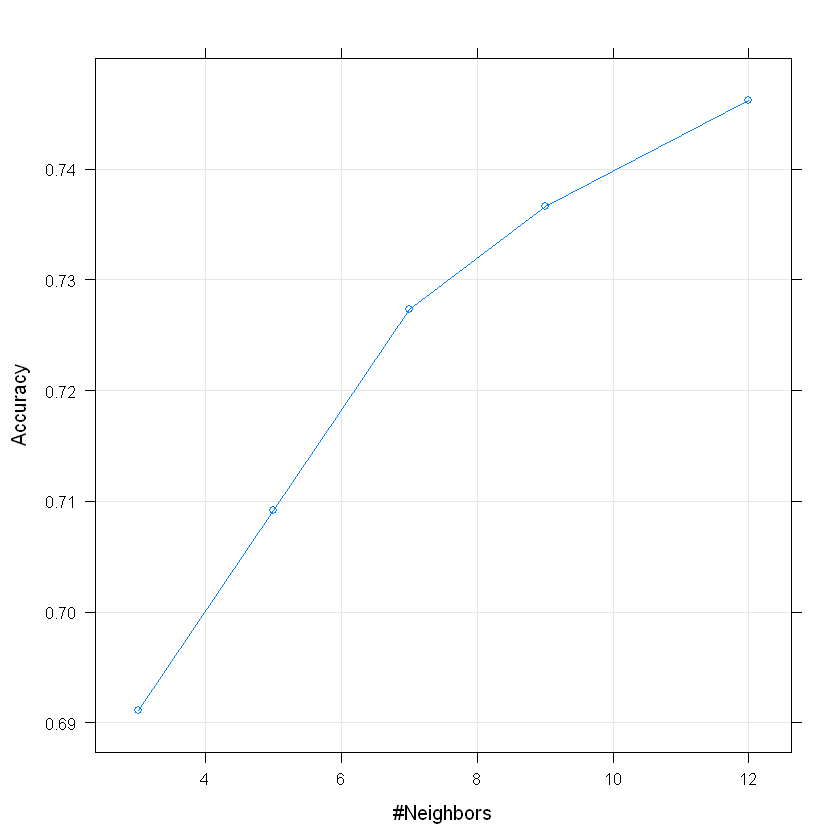

In [12]:
plot(fitKNN, ylab="Accuracy")
#Accuracy was used to select the optimal model using the largest value, when K = 12, we have the largest accuracy, 
#so I pick k=12.

### e) (0.8)

Get the (class) predictions and produce the confusion matrix. Report
the code, the confusion matrix and accuracy (only) and
comment on the overall accuracy of the model.

In [26]:
knn_predictions <- predict(fitKNN, data_test_stand)
confusionMatrix(knn_predictions, as.factor(data_test_stand$DEFAULT), mode = "prec_recall")
#The accuracy of the overall model is 0.7668.Overall F1 score is 0.8648, it is high. 
#Overall Recall(sensitivity & specificity) is 0.9551
#Overall Precision(positive predictive value & negative predictive value) is 0.7900

Confusion Matrix and Statistics

          Reference
Prediction  NO YES
       NO  745 198
       YES  35  21
                                          
               Accuracy : 0.7668          
                 95% CI : (0.7393, 0.7927)
    No Information Rate : 0.7808          
    P-Value [Acc > NIR] : 0.8659          
                                          
                  Kappa : 0.0697          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.7900          
                 Recall : 0.9551          
                     F1 : 0.8648          
             Prevalence : 0.7808          
         Detection Rate : 0.7457          
   Detection Prevalence : 0.9439          
      Balanced Accuracy : 0.5255          
                                          
       'Positive' Class : NO              
                                          

### f) (0.8)

Get recall and precision for each class.

NOTE: you can do this in different ways. You must report the code used and the output.

Evaluate the performance of the classification model with respect to the
individual classes and compare with the accuracy.

In [29]:
confusionMatrix(knn_predictions, as.factor(data_test_stand$DEFAULT), mode = "prec_recall",positive="NO")
confusionMatrix(knn_predictions, as.factor(data_test_stand$DEFAULT), mode = "prec_recall",positive="YES")
#The accuracy are the same as for the overall mode. However, when the positive class is NO, the precision, 
#recall, and F1 are higher than when positive class is YES.

Confusion Matrix and Statistics

          Reference
Prediction  NO YES
       NO  745 198
       YES  35  21
                                          
               Accuracy : 0.7668          
                 95% CI : (0.7393, 0.7927)
    No Information Rate : 0.7808          
    P-Value [Acc > NIR] : 0.8659          
                                          
                  Kappa : 0.0697          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.7900          
                 Recall : 0.9551          
                     F1 : 0.8648          
             Prevalence : 0.7808          
         Detection Rate : 0.7457          
   Detection Prevalence : 0.9439          
      Balanced Accuracy : 0.5255          
                                          
       'Positive' Class : NO              
                                          

Confusion Matrix and Statistics

          Reference
Prediction  NO YES
       NO  745 198
       YES  35  21
                                          
               Accuracy : 0.7668          
                 95% CI : (0.7393, 0.7927)
    No Information Rate : 0.7808          
    P-Value [Acc > NIR] : 0.8659          
                                          
                  Kappa : 0.0697          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.37500         
                 Recall : 0.09589         
                     F1 : 0.15273         
             Prevalence : 0.21922         
         Detection Rate : 0.02102         
   Detection Prevalence : 0.05606         
      Balanced Accuracy : 0.52551         
                                          
       'Positive' Class : YES             
                                          

## Q2

Use the `credit_long.csv` dataset to train a Decision Tree that uses recursive partitioning. 

### a) (0.3)

Load the data, summarize it. Looking at the entire dataset, what is the probability of default = NO and default = YES?

In [19]:
credit_long <- read.csv("credit_long.csv")
summary(credit_long)
#Probability of Default(NO)=23364/30000=0.7788 
#Probability of Default(YES)=6636/30000=0.2212

   LIMIT_BAL           GENDER         MARRIAGE          AGE       
 Min.   :  10000   Min.   :1.000   Min.   :0.000   Min.   :21.00  
 1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000   1st Qu.:28.00  
 Median : 140000   Median :2.000   Median :2.000   Median :34.00  
 Mean   : 167484   Mean   :1.604   Mean   :1.552   Mean   :35.49  
 3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:41.00  
 Max.   :1000000   Max.   :2.000   Max.   :3.000   Max.   :79.00  
   BILL_AMT1         BILL_AMT2        BILL_AMT3         BILL_AMT4      
 Min.   :-165580   Min.   :-69777   Min.   :-157264   Min.   :-170000  
 1st Qu.:   3559   1st Qu.:  2985   1st Qu.:   2666   1st Qu.:   2327  
 Median :  22382   Median : 21200   Median :  20089   Median :  19052  
 Mean   :  51223   Mean   : 49179   Mean   :  47013   Mean   :  43263  
 3rd Qu.:  67091   3rd Qu.: 64006   3rd Qu.:  60165   3rd Qu.:  54506  
 Max.   : 964511   Max.   :983931   Max.   :1664089   Max.   : 891586  
   BILL_AMT5        BILL_AM

### b) (0.2)

Split the dataset into 80% training and 20% testing. Report only the
code for this question.

In [5]:
train_rows_l <- createDataPartition(y = credit_long$DEFAULT, p = 0.8, list = FALSE)
data_train_l <- credit_long[train_rows_l,]
data_test_l <- credit_long[-train_rows_l,]

### c) (0.5)

Train a decision tree model. Decide whether you should standardize
the data. If yes, decide which attributes to include and apply the
standardization. If not, explain why. (It may take a minute or so for the
code to run).

In [11]:
#In the case of a decision tree, the data does not get normalized because the decision tree 
#uses the concept of Entropy and not a distance measure. 
fitDT <- train(data = data_train_l, method="rpart", DEFAULT~.)


### d) (1)

Plot the tree and attach the plot.

- Are all the attributes used in the decision tree? If no, why do you
think that is?
- How many leaf nodes does your tree have?
- Pick 2 leaf nodes, one with outcome NO and one with outcome YES
and interpret them (If you do not have leaf nodes with YES, pick any
two). 

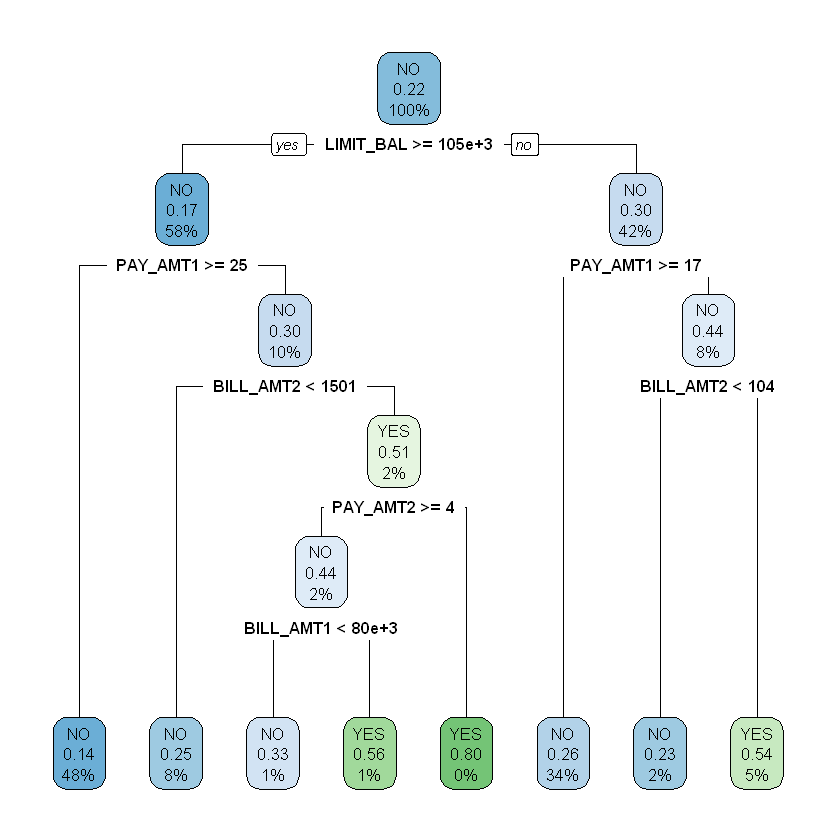

In [12]:
rpart.plot(fitDT$finalModel)
#No, more attributes used, more confused the models will create. It might also cause overfitting problem.
#I have 8 leaf nodes in my decision tree model.
#If limit_bal is less than 105e + 3, and payment_amount_1 is greater than 25, clients might not default.(The first left leaf node)
#If limit_bal is greater than 105e + 3, and payment_amount_1 is less than 17 and bill_amount_2 is greater than 104, the clients
#might default. (The first right leaft node)

### e) (0.5)

Get the class level predictions, produce the confusion matrix and comment on the performance of the overall model looking at accuracy. You need to report both code and output obtained.

In [15]:
DT_predictions <- predict(fitDT$finalModel, newdata = data_test_l, type = "class")
confusionMatrix(DT_predictions, as.factor(data_test_l$DEFAULT), mode = "prec_recall")
#The accuracy of the overall model is 0.7863.Overall F1 score is 0.8754, it is high. 
#Overall Recall(sensitivity & specificity) is 0.9638
#Overall Precision(positive predictive value & negative predictive value) is 0.8018

Confusion Matrix and Statistics

          Reference
Prediction   NO  YES
       NO  4503 1113
       YES  169  214
                                          
               Accuracy : 0.7863          
                 95% CI : (0.7757, 0.7966)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 0.08273         
                                          
                  Kappa : 0.1678          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
              Precision : 0.8018          
                 Recall : 0.9638          
                     F1 : 0.8754          
             Prevalence : 0.7788          
         Detection Rate : 0.7506          
   Detection Prevalence : 0.9362          
      Balanced Accuracy : 0.5625          
                                          
       'Positive' Class : NO              
                                          

### f) (0.5)

Get the recall and precision for each individual class and
comment on the performance of the model for the individual classes,
compared to the overall accuracy.

NOTE: you can do this in different ways.
You must report the code used and the output.

In [18]:
confusionMatrix(DT_predictions, as.factor(data_test_l$DEFAULT), mode = "prec_recall",positive = "NO")
confusionMatrix(DT_predictions, as.factor(data_test_l$DEFAULT), mode = "prec_recall",positive = "YES")
#The accuracies are the same as for the overall mode. When the positive class is NO, the precision, 
#recall, and F1 are higher than when positive class is YES.

Confusion Matrix and Statistics

          Reference
Prediction   NO  YES
       NO  4503 1113
       YES  169  214
                                          
               Accuracy : 0.7863          
                 95% CI : (0.7757, 0.7966)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 0.08273         
                                          
                  Kappa : 0.1678          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
              Precision : 0.8018          
                 Recall : 0.9638          
                     F1 : 0.8754          
             Prevalence : 0.7788          
         Detection Rate : 0.7506          
   Detection Prevalence : 0.9362          
      Balanced Accuracy : 0.5625          
                                          
       'Positive' Class : NO              
                                          

Confusion Matrix and Statistics

          Reference
Prediction   NO  YES
       NO  4503 1113
       YES  169  214
                                          
               Accuracy : 0.7863          
                 95% CI : (0.7757, 0.7966)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 0.08273         
                                          
                  Kappa : 0.1678          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
              Precision : 0.55875         
                 Recall : 0.16127         
                     F1 : 0.25029         
             Prevalence : 0.22120         
         Detection Rate : 0.03567         
   Detection Prevalence : 0.06384         
      Balanced Accuracy : 0.56255         
                                          
       'Positive' Class : YES             
                                          

### g) (1)

Get again the predictions but this time as predicted probabilities and set
a cut-off of 0.8 for the NO class.

- Produce the confusion matrix and comment on the performance of the overall model looking at accuracy;
- Get recall and precision for the individual classes and compare to the results you obtained in question e) and f)

In [26]:
DT_prob <- as.data.frame(predict(fitDT$finalModel, newdata = data_test_l, type = "prob"))
DT_prob$pred_class <- ifelse(DT_prob$NO > 0.8, "NO", "YES")


In [24]:
DT_prob$pred_class<- as.factor(DT_prob$pred_class)
confusionMatrix(as.factor(DT_prob$pred_class), as.factor(data_test_l$DEFAULT))
#The accuracy of the overall model is 0.5669.
#Sensitivity is 0.5327 while specificity is 0.6873
#Positive predictive value is 0.8571 while negative predictive value is 0.2947

Confusion Matrix and Statistics

          Reference
Prediction   NO  YES
       NO  2489  415
       YES 2183  912
                                          
               Accuracy : 0.5669          
                 95% CI : (0.5543, 0.5795)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.149           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.5327          
            Specificity : 0.6873          
         Pos Pred Value : 0.8571          
         Neg Pred Value : 0.2947          
             Prevalence : 0.7788          
         Detection Rate : 0.4149          
   Detection Prevalence : 0.4841          
      Balanced Accuracy : 0.6100          
                                          
       'Positive' Class : NO              
                        

In [25]:
confusionMatrix(as.factor(DT_prob$pred_class), as.factor(data_test_l$DEFAULT),mode="prec_recall",positive="NO")
confusionMatrix(as.factor(DT_prob$pred_class), as.factor(data_test_l$DEFAULT),,mode="prec_recall",positive="YES")

Confusion Matrix and Statistics

          Reference
Prediction   NO  YES
       NO  2489  415
       YES 2183  912
                                          
               Accuracy : 0.5669          
                 95% CI : (0.5543, 0.5795)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.149           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.8571          
                 Recall : 0.5327          
                     F1 : 0.6571          
             Prevalence : 0.7788          
         Detection Rate : 0.4149          
   Detection Prevalence : 0.4841          
      Balanced Accuracy : 0.6100          
                                          
       'Positive' Class : NO              
                                          

Confusion Matrix and Statistics

          Reference
Prediction   NO  YES
       NO  2489  415
       YES 2183  912
                                          
               Accuracy : 0.5669          
                 95% CI : (0.5543, 0.5795)
    No Information Rate : 0.7788          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.149           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
              Precision : 0.2947          
                 Recall : 0.6873          
                     F1 : 0.4125          
             Prevalence : 0.2212          
         Detection Rate : 0.1520          
   Detection Prevalence : 0.5159          
      Balanced Accuracy : 0.6100          
                                          
       'Positive' Class : YES             
                                          

The balanced accuracy and accuracy are the same for both models. For the first model,positive class is "NO", 
it has higher precision, F1 score, detection rate. However, the recall, prevalence and detection prevalence 
are much lower than the second model, whose positive class is "YES".